## Two Way ANOVA using Statsmodels

In [23]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

data = 'http://nz14-46.ifj.edu.pl/ANOVA/tyres2.csv'

df = pd.read_csv(data, index_col=0)

df.head(60)


,miles,manufacture,surface
1,36,X,Asphalt
2,39,X,Asphalt
3,39,X,Asphalt
4,38,X,Asphalt
5,38,X,Concrete
6,40,X,Concrete
7,41,X,Concrete
8,40,X,Concrete
9,34,X,Gravel
10,32,X,Gravel


### Getting Effect Sizes

In [25]:

# ANOVA
formula = 'miles~C(surface)+C(manufacture)+C(surface):C(manufacture)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

                               sum_sq    df          F        PR(>F)
C(surface)                 241.722222   2.0  40.663551  7.152528e-09
C(manufacture)             155.388889   2.0  26.140187  4.838091e-07
C(surface):C(manufacture)  195.611111   4.0  16.453271  6.093609e-07
Residual                    80.250000  27.0        NaN           NaN


In [26]:
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov


eta_squared(aov_table)
omega_squared(aov_table)

print(aov_table.round(4))

                             sum_sq    df        F  PR(>F)  eta_sq  omega_sq
C(surface)                 241.7222   2.0  40.6636     0.0  0.3592    0.3488
C(manufacture)             155.3889   2.0  26.1402     0.0  0.2309    0.2211
C(surface):C(manufacture)  195.6111   4.0  16.4533     0.0  0.2907    0.2718
Residual                    80.2500  27.0      NaN     NaN     NaN       NaN


### Plotting the Residuals:

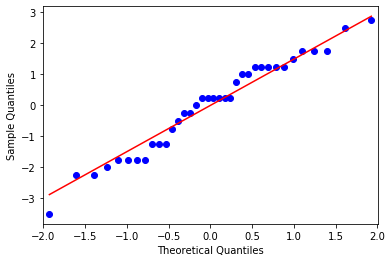

In [27]:
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()